* Veri 5 farklı türe ait 5 farklı klasörden oluşuyor. Bu klasörde ki resimler üzerinden ayrı train test klasörü oluşturuldu ve resimler için gerekli ön işlem ve mdeol kurulumu bu tarin ve test dosya yolları kullanılarak yapıldı. Derse de yapılan son iki notebook da ki gibi aşamalar gerçekleştirldi

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

C:\Users\SAMSUNG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pwd

'C:\\Users\\SAMSUNG\\Desktop\\DL\\Proje-2'

In [4]:
my_data_dir='flower_photos'

In [5]:
os.listdir(my_data_dir)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

# Veri Setini Taniyalim

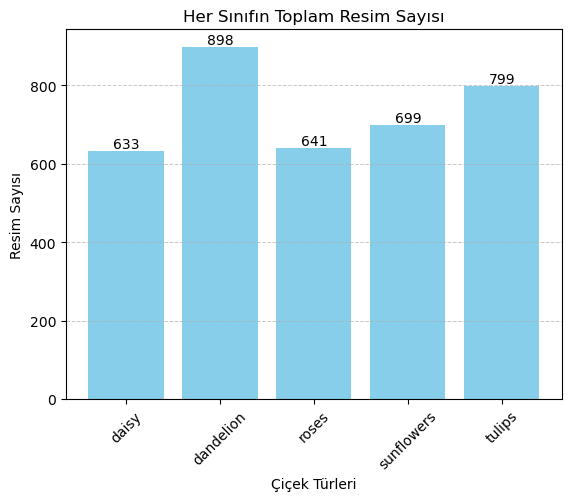

In [7]:
import os
import matplotlib.pyplot as plt

# Çiçek türlerini tanımlayın
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Resimlerin bulunduğu dizini tanımlayın
data_dir = "flower_photos"

# Her sınıf için toplam resim sayısını hesaplayın
total_counts = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)

# Toplam resim sayılarını bir çubuk grafik ile gösterin
plt.bar(classes, total_counts, color='skyblue')
plt.xlabel('Çiçek Türleri')
plt.ylabel('Resim Sayısı')
plt.title('Her Sınıfın Toplam Resim Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Çubukların üzerine değerleri yazdırın
for i, count in enumerate(total_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

**Cicek sayilari gorece dengeli (balanced) kabul edilebilir**

## Veri Setini Train ve Test Olarak Ayiralim

Bunu bir defa yaptiktan sonra bu kodu bir daha calistirma!!!

In [8]:
# Verileri train ve test olarak iki ust klasore ayiralim;

#mevcut klasorun yolunu tanittik;
data_folder = 'flower_photos'

#Train ve test klasörlerini oluşturalim:
import os
import shutil

# Train ve test klasörlerini oluşturun
train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

#Her sınıf için train ve test klasörlerini oluşturalim:
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

for flower_class in classes:
    # Sınıfa ait train ve test klasörlerini oluşturun
    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)

    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

# Verileri train ve test klasörlerine kopyalayın. Örneğin, her sınıfın %80'i train, %20'si test olarak ayırmak isterseniz:
import random

split_ratio = 0.8  # Train için %80, Test için %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)  # Verileri rastgele sıralayın

    split_index = int(len(flower_images) * split_ratio)

    # Train klasörüne kopyala
    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    # Test klasörüne kopyala
    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)

In [12]:
train_path = ('C:\\Users\\SAMSUNG\\Desktop\\DL\\Proje-2\\flower_photos\\train')
test_path =('C:\\Users\\SAMSUNG\\Desktop\\DL\\Proje-2\\flower_photos\\test')

print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Cicekleri Gorelim

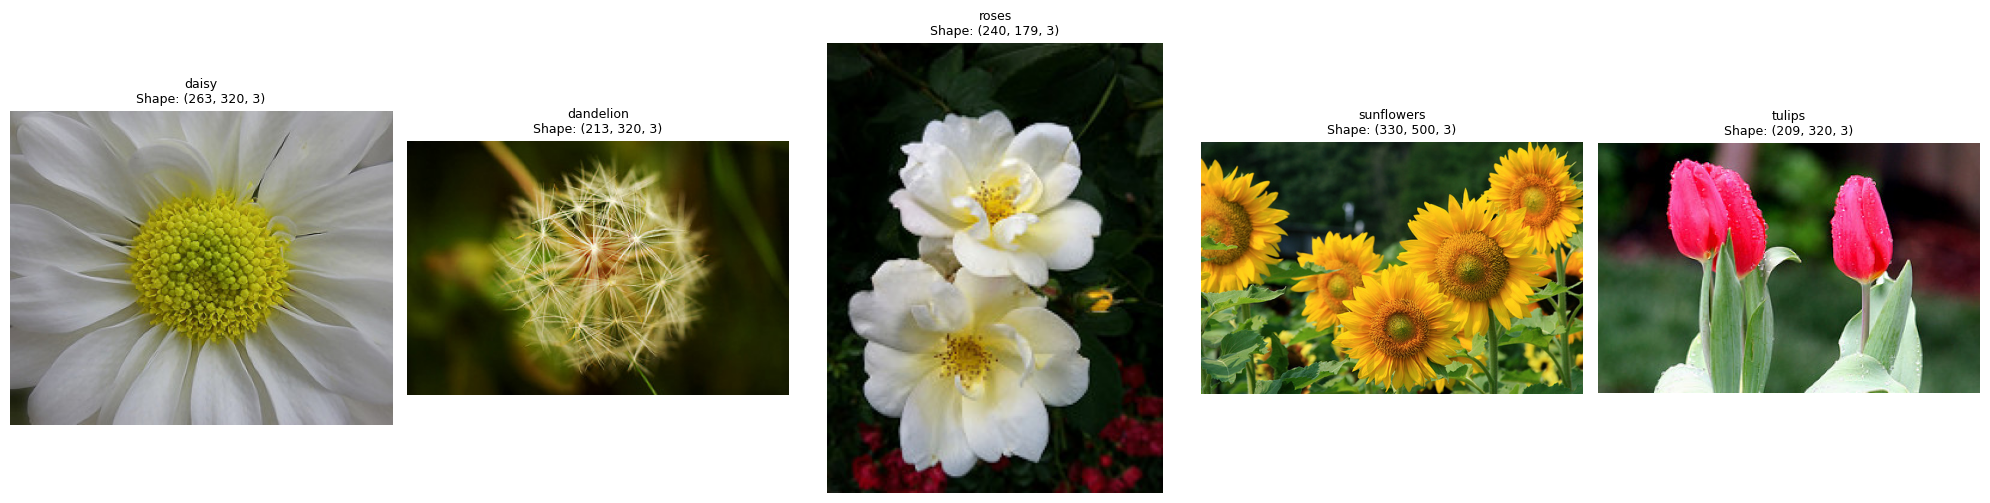

In [13]:
# Trainden rastgele 5 tanesini secip, resimlerini cizdirelim;

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

fig, axes = plt.subplots(1, len(classes), figsize=(20, 5))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(train_path, class_name)

    # Bu sınıf için ilk resmin yolu
    first_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    # Resmi açın
    img = Image.open(first_image_path)

    # Resmi bir numpy dizisine çevirin
    img_array = np.array(img)

    # Resmi görselleştirin
    axes[i].imshow(img)
    axes[i].set_title(f"{class_name}\nShape: {img_array.shape}", fontsize=9)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Ciceklerin Olculerine Bakalim

In [11]:
#pip install scikit-image

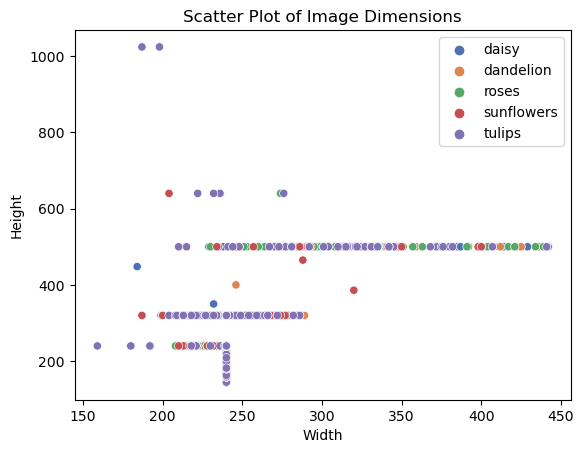

In [14]:
# Elimizdeki (traindeki) cicek resimlerinin ortalama olculerini bulmak istiyoruz;

import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            x.append(d1)
            y.append(d2)
            hue.append(class_name)

sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()


In [54]:
print(np.mean(x), np.mean(y))

271.36980231765506 363.1895023858214


** Cicek resimlerinin ortalama genisligi 272, boyu 365. Bunlari ortalama bir degerde bulusturalim. 

### Final Image Size

Transfer Learning yontemlerinden VGG16 modelini kullanmak istiyorum.  
VGG16 224 X 224 datayla egitildigi icin bu olculeri tercih ettik.

In [55]:
image_shape = (224,224,3) 

### Ciceklerin Pixel Degerlerine Bakalim

In [15]:
path1=train_path+'/daisy'+'/5547758_eea9edfd54_n.jpg'

In [16]:
flower_img=imread(path1)

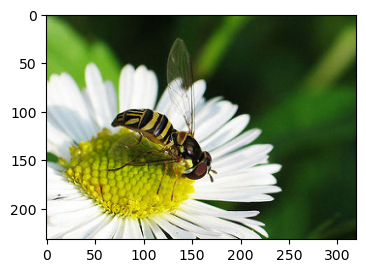

In [17]:
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [18]:
flower_img.max()

255

In [19]:
flower_img.min()

0

** Ciceklerin olculeri resize edilmemis (255'e bolunmemis), Bunu **bolmemiz lazim**. 

## Image Data Generator

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Generator islemini sadece train datasina uygulayacagiz;
image_gen_train = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )


# Test datasina sadece scaling islemi uygulayacagiz. 
# Boylece sinamayi test datasinin orijinal hallerini kullanarak gerceklestirmek istiyoruz;

image_gen_test = ImageDataGenerator(rescale=1/255)

#**********************************************************************************************
# Img Gen train ve test datalarina uygulayalim;

batch_size = 32

train_image_gen = image_gen_train.flow_from_directory(train_path,
                                               target_size=(224, 224),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)

test_image_gen = image_gen_test.flow_from_directory(test_path,
                                               target_size=(224, 224),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)

Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


** Veri sayisi degismedi yine trainde 2936, testte 734 resim, 5 class var. Ama traindekileri her Epoch'da farkli sekillerde kullanarak, sanki cok daha fazla veri varmis gibi, cok daha iyi bir ogrenme gerceklesecek. 

### Rescaling Sonucunda Resimlerin Pixel Degerlerine Bakalim

In [21]:
train_image_gen.next()[0][0].max() 

1.0

In [22]:
train_image_gen.next()[0][0].min() 

0.0

In [23]:
test_image_gen.next()[0][0].max() 

1.0

In [24]:
test_image_gen.next()[0][0].min() 

0.0

**Rescaling islemi basarili olmus.**

# CNN Modelin Kurulması

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf

In [28]:
model = Sequential()

# 1. Katman;
model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=(224, 224,3), 
                 activation='relu', 
                 padding = 'same')) #padding = 'same': 0 ekle
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2. Katman;
model.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3. Katman;
model.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 4. Katman;
model.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.3))


#Flatten (Input) Katmani
model.add(Flatten())

# ---ANN---

# Fully_connected layer;
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Cikis Katmani; 
model.add(Dense(5, activation='softmax'))


# Modeli compile edelim; 
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 128)   

## Early Stopping

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

## Model Training

In [92]:
results = model.fit(train_image_gen,
                    epochs=20,
                    validation_data = test_image_gen,
                    callbacks = [early_stop])

Epoch 1/20
92/92 [==============================] - 462s 5s/step - loss: 1.3505 - accuracy: 0.4877 - val_loss: 4.8554 - val_accuracy: 0.2446
Epoch 2/20
92/92 [==============================] - 467s 5s/step - loss: 1.0595 - accuracy: 0.5913 - val_loss: 4.5940 - val_accuracy: 0.2446
Epoch 3/20
92/92 [==============================] - 467s 5s/step - loss: 0.9730 - accuracy: 0.6241 - val_loss: 4.0508 - val_accuracy: 0.2486
Epoch 4/20
92/92 [==============================] - 464s 5s/step - loss: 0.8730 - accuracy: 0.6626 - val_loss: 2.7285 - val_accuracy: 0.2609
Epoch 5/20
92/92 [==============================] - 458s 5s/step - loss: 0.8373 - accuracy: 0.6772 - val_loss: 1.9722 - val_accuracy: 0.3410
Epoch 6/20
92/92 [==============================] - 464s 5s/step - loss: 0.7694 - accuracy: 0.7001 - val_loss: 1.3369 - val_accuracy: 0.5068
Epoch 7/20
92/92 [==============================] - 466s 5s/step - loss: 0.7475 - accuracy: 0.7171 - val_loss: 0.7849 - val_accuracy: 0.7092
Epoch 8/20
92

## Evaluating the Model

In [101]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.350540,0.487730,4.855421,0.244565
1,1.059494,0.591343,4.593963,0.244565
2,0.973003,0.624063,4.050786,0.248641
3,0.873005,0.662577,2.728503,0.260870
4,0.837291,0.677232,1.972198,0.341033


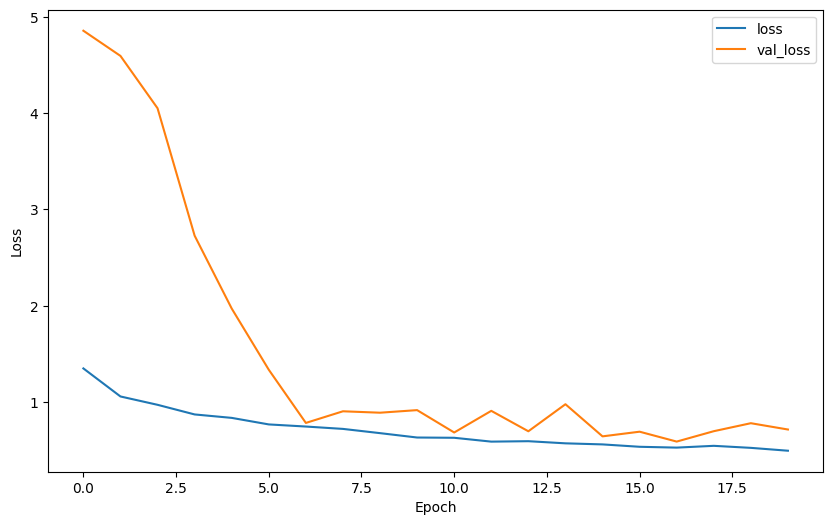

In [102]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

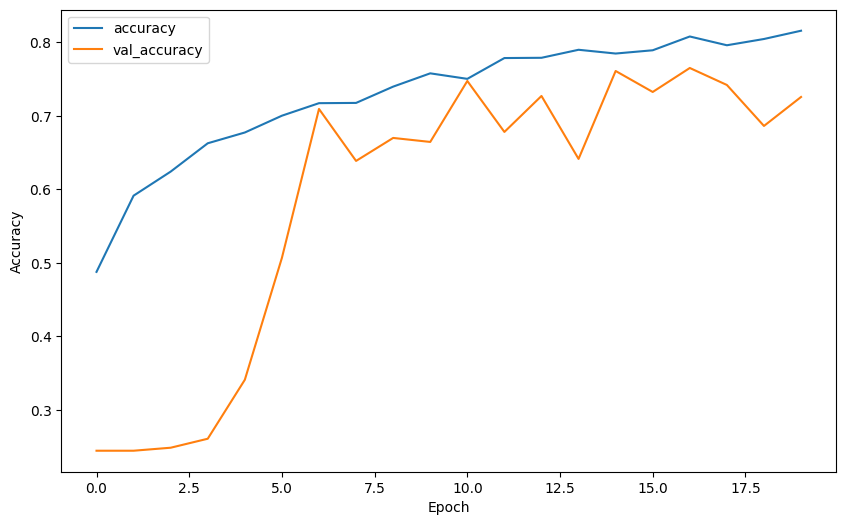

In [103]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [104]:
model.metrics_names

['loss', 'accuracy']

In [182]:
model.evaluate(test_image_gen) # ??? calismadi

23/23 [==============================] - 43s 2s/step - loss: 2.6430 - accuracy: 0.2446


[2.642976760864258, 0.2445652186870575]

In [106]:
pred_probabilities = model.predict(test_image_gen)

23/23 [==============================] - 27s 1s/step


In [107]:
pred_probabilities

array([[9.31699947e-03, 7.40693808e-01, 3.96718234e-02, 9.52620581e-02,
        1.15055293e-01],
       [3.45296506e-03, 1.24624856e-01, 6.73697656e-03, 8.48742366e-01,
        1.64428484e-02],
       [1.40224444e-03, 6.02018335e-05, 8.05525899e-01, 3.75019666e-03,
        1.89261407e-01],
       ...,
       [3.43140634e-03, 5.93133628e-01, 9.68569070e-02, 1.16300993e-01,
        1.90277115e-01],
       [5.79846324e-03, 9.45953727e-01, 1.39601510e-02, 1.32194743e-03,
        3.29657532e-02],
       [2.45000632e-03, 6.32923067e-01, 1.62422173e-02, 1.33588850e-01,
        2.14795902e-01]], dtype=float32)

In [108]:
test_image_gen.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [110]:
#predictions = pred_probabilities > 0.5
#y_train_pred=model.predict(X_train)
probs = np.array(pred_probabilities)
y_train_pred = np.argmax(probs, axis=1)
y_train_pred

array([1, 3, 2, 1, 1, 4, 2, 2, 1, 1, 1, 4, 0, 0, 3, 4, 1, 1, 3, 1, 3, 4,
       2, 4, 3, 1, 4, 1, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 1, 1, 1, 3, 2, 3,
       4, 4, 2, 0, 4, 1, 4, 4, 4, 2, 1, 2, 3, 3, 1, 3, 3, 4, 3, 1, 4, 4,
       3, 2, 3, 4, 2, 3, 4, 1, 4, 2, 3, 4, 1, 1, 3, 2, 3, 2, 4, 1, 1, 4,
       1, 1, 3, 2, 2, 1, 3, 2, 3, 3, 2, 1, 3, 1, 4, 3, 3, 1, 4, 4, 3, 2,
       4, 3, 1, 3, 1, 2, 3, 4, 1, 3, 3, 4, 1, 1, 3, 1, 0, 1, 2, 4, 2, 4,
       3, 1, 1, 2, 1, 4, 0, 1, 1, 4, 0, 1, 0, 3, 1, 1, 1, 4, 2, 3, 3, 1,
       3, 1, 3, 4, 1, 4, 4, 3, 3, 3, 1, 2, 3, 3, 4, 2, 3, 4, 4, 3, 4, 0,
       3, 2, 3, 0, 0, 4, 2, 3, 1, 2, 1, 1, 3, 4, 3, 0, 2, 2, 3, 1, 3, 4,
       3, 4, 2, 3, 3, 4, 4, 2, 1, 4, 2, 1, 3, 1, 3, 4, 1, 4, 3, 4, 4, 3,
       4, 1, 1, 3, 0, 3, 2, 3, 1, 1, 1, 4, 2, 2, 3, 3, 4, 2, 2, 0, 1, 0,
       4, 4, 3, 0, 2, 3, 2, 1, 4, 0, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2, 0, 3,
       2, 0, 3, 3, 1, 2, 0, 3, 1, 2, 4, 3, 4, 2, 4, 2, 4, 3, 3, 2, 4, 4,
       0, 4, 3, 4, 2, 2, 1, 3, 3, 1, 3, 2, 1, 1, 1,

In [111]:
y_train_pred[:50]

array([1, 3, 2, 1, 1, 4, 2, 2, 1, 1, 1, 4, 0, 0, 3, 4, 1, 1, 3, 1, 3, 4,
       2, 4, 3, 1, 4, 1, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 1, 1, 1, 3, 2, 3,
       4, 4, 2, 0, 4, 1], dtype=int64)

In [112]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
print(classification_report(test_image_gen.classes, y_train_pred))

              precision    recall  f1-score   support

           0       0.06      0.03      0.04       127
           1       0.20      0.23      0.21       180
           2       0.13      0.12      0.13       129
           3       0.16      0.19      0.17       140
           4       0.23      0.25      0.24       160

    accuracy                           0.17       736
   macro avg       0.16      0.16      0.16       736
weighted avg       0.16      0.17      0.17       736



In [116]:
confusion_matrix(test_image_gen.classes,y_train_pred)

array([[ 4, 36, 23, 37, 27],
       [16, 41, 36, 49, 38],
       [21, 38, 16, 21, 33],
       [13, 43, 21, 26, 37],
       [12, 51, 24, 33, 40]], dtype=int64)

## Modeli Disa Aktaralim (Kayıt işlemi)

In [117]:
from tensorflow.keras.models import load_model
model.save('flowers_manuel_model.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predicting on an Exteral Image

In [ ]:
train_image_gen.class_indices

In [ ]:
test_image_gen.class_indices

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_manuel_model.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

# Transfer Learning

## VGG16 Model 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [153]:
# VGG16 Modeli cagiralim; 
VGG16_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                                include_top=False,                                                
                                                weights = 'imagenet',
                                                pooling='avg')                           
                                                
# VGG16'nin agirliklarini kullansin;
for layer in pretrained_model.layers: 
        layer.trainable=False

VGG16_model.add(pretrained_model)        

# Flatten Layer (Input)
VGG16_model.add(Flatten())

# ---ANN---

# Fully_connected layer;
VGG16_model.add(Dense(512, activation='relu'))
VGG16_model.add(BatchNormalization())
VGG16_model.add(Dropout(0.3))

# Cikis Katmani; 
VGG16_model.add(Dense(5, activation='softmax'))

# Modeli compile edelim; 
optimizer = Adam(learning_rate=0.001)
VGG16_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])     


# Model özeti
VGG16_model.summary()


58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_22 (Ba  (None, 224, 224, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                       

### Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

### Model Training

In [156]:
results = VGG16_model.fit(train_image_gen,
                    epochs=50,
                    validation_data = test_image_gen,
                    callbacks = [early_stop])

Epoch 1/50
92/92 [==============================] - 640s 7s/step - loss: 0.7842 - accuracy: 0.7205 - val_loss: 1.1364 - val_accuracy: 0.5272
Epoch 2/50
92/92 [==============================] - 633s 7s/step - loss: 0.5771 - accuracy: 0.7952 - val_loss: 1.0139 - val_accuracy: 0.6209
Epoch 3/50
92/92 [==============================] - 647s 7s/step - loss: 0.5357 - accuracy: 0.8030 - val_loss: 0.7113 - val_accuracy: 0.7785
Epoch 4/50
92/92 [==============================] - 642s 7s/step - loss: 0.4968 - accuracy: 0.8187 - val_loss: 0.6315 - val_accuracy: 0.7649
Epoch 5/50
92/92 [==============================] - 645s 7s/step - loss: 0.4803 - accuracy: 0.8234 - val_loss: 0.6064 - val_accuracy: 0.8057
Epoch 6/50
92/92 [==============================] - 644s 7s/step - loss: 0.4683 - accuracy: 0.8309 - val_loss: 0.6590 - val_accuracy: 0.7758
Epoch 7/50
92/92 [==============================] - 644s 7s/step - loss: 0.4419 - accuracy: 0.8412 - val_loss: 0.6956 - val_accuracy: 0.7772
Epoch 8/50
92

### Evaluating the Model

In [174]:
summary = pd.DataFrame(VGG16_model.history.history)
summary.tail()

""


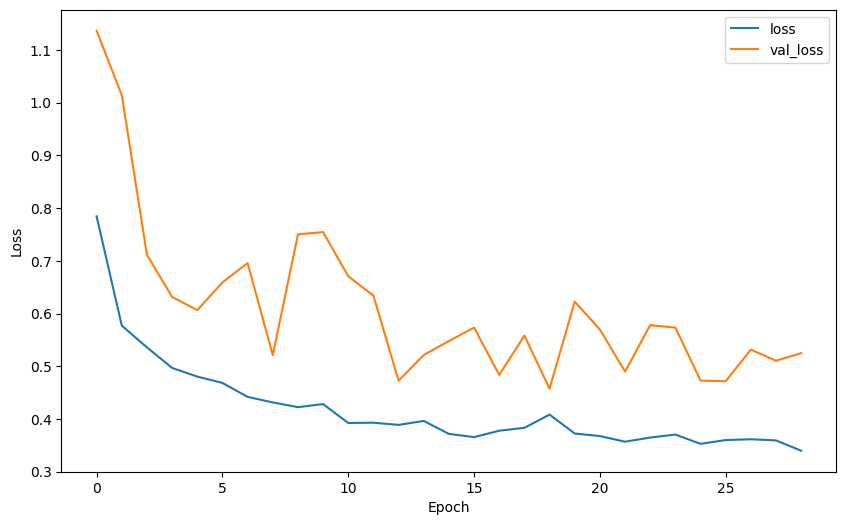

In [158]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

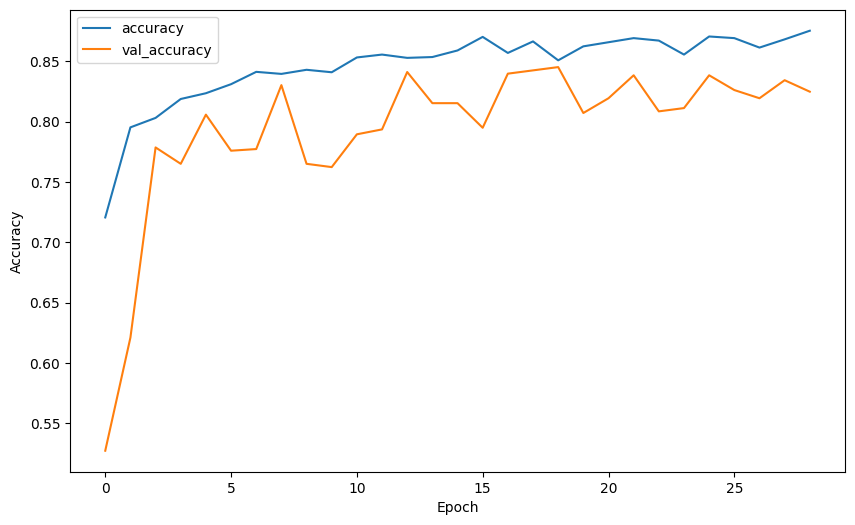

In [159]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [160]:
VGG16_model.metrics_names

['loss', 'accuracy']

In [165]:
VGG16_model.evaluate(test_image_gen)

23/23 [==============================] - 127s 6s/step - loss: 0.5248 - accuracy: 0.8247


[0.5248232483863831, 0.82472825050354]

In [162]:
pred_probabilities = VGG16_model.predict(test_image_gen)

23/23 [==============================] - 126s 5s/step


In [163]:
pred_probabilities

array([[1.0081240e-02, 9.3367565e-01, 3.0389573e-02, 1.6513566e-02,
        9.3399445e-03],
       [8.5684597e-02, 3.2992386e-03, 1.2044697e-03, 9.0820181e-01,
        1.6099566e-03],
       [1.9222634e-05, 9.9997389e-01, 4.7335188e-06, 2.4241379e-07,
        1.8507438e-06],
       ...,
       [6.5715823e-05, 9.9991798e-01, 9.3560985e-08, 1.6191427e-05,
        5.1522257e-08],
       [3.1551853e-02, 8.7322861e-01, 7.5177394e-02, 3.6019596e-04,
        1.9681934e-02],
       [2.1630508e-04, 8.5958447e-05, 1.4268738e-04, 2.0914730e-07,
        9.9955481e-01]], dtype=float32)

In [164]:
test_image_gen.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [166]:
probs = np.array(pred_probabilities)
y_train_pred = np.argmax(probs, axis=1)
predictions=y_train_pred

In [167]:
predictions[:50]

array([1, 3, 1, 3, 0, 1, 2, 1, 4, 4, 0, 2, 1, 0, 0, 4, 3, 4, 4, 1, 3, 1,
       1, 3, 1, 2, 3, 3, 4, 0, 1, 1, 1, 1, 3, 2, 0, 4, 4, 3, 0, 4, 0, 0,
       1, 0, 3, 3, 3, 4], dtype=int64)

In [168]:
from sklearn.metrics import classification_report,confusion_matrix

In [169]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.17      0.16      0.16       127
           1       0.24      0.26      0.25       180
           2       0.20      0.23      0.22       129
           3       0.18      0.14      0.15       140
           4       0.27      0.29      0.28       160

    accuracy                           0.22       736
   macro avg       0.21      0.22      0.21       736
weighted avg       0.22      0.22      0.22       736



In [171]:
confusion_matrix(test_image_gen.classes,predictions)

array([[20, 36, 17, 22, 32],
       [28, 46, 39, 24, 43],
       [19, 30, 30, 23, 27],
       [22, 39, 33, 19, 27],
       [27, 37, 31, 18, 47]], dtype=int64)

### Modeli Disa Aktaralim 

In [175]:
from tensorflow.keras.models import load_model
VGG16_model.save('flowers_transfer_learning_VGG16.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predicting on External an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('cat_dog_detector.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


In [ ]:
# Birden fazla external resmi birlikte incelemek icin;

import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning.h5')

# Yeni resimlerin bulundugu dosya yolu tanimlayalim; 
image_dir = 'r"D:\DL\Project 2 - Flower_photos\mert b\Flower_for_prediction"'

# Bu dizindeki tüm jpg dosyalarının yollarını listeyelim;
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Sınıf isimlerini tanımlayalim; 
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Her bir resmi işleyelim ve tahmin yapalim; 

for image_path in image_paths:
    # Resmi açın ve uygun bir formata dönüştürün
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Tahmin yapın
    prediction = model.predict(image_array)

    # Tahmin edilen sınıfın indexini veadini ekrana alalim;
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names(predicted_class_idx)
    
    
    # Tahmin edilen sınıfı ekrana yazdırın
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Tahmin edilen class: {predicted_class_idx}, {predicted_class_name}")


## ResNet152 Model 

In [129]:
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions

In [130]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet152(include_top=False,
                                                   input_shape=(224,224,3),
                                                   pooling='avg',
                                                   weights= None)
for layer in pretrained_model.layers: # tum katmanlar UYGULAMAK ICIN
        layer.trainable=False # ResNet152 agirliklarini degistirmemek icin False yaptik. True olursa ResNet152 agirliklarini degistirebiliriz. Guclu bilgiisayarlarda.

resnet_model.add(pretrained_model)  # 152 katmani burada kullaniyoruz

# Ust kismi cok degistirme
#----
# Altta degisiklik yapabilirsin.

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))
resnet_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model Summary

In [131]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               1049088   
                                                                 
 dense_15 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 59422597 (226.68 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


### Early Stopping¶

In [132]:
from tensorflow.keras.callbacks import EarlyStopping

In [133]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

### Model Training (ResNet152)

In [134]:
results = resnet_model.fit(train_image_gen,epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/20
92/92 [==============================] - 678s 7s/step - loss: 1.6613 - accuracy: 0.2229 - val_loss: 1.6021 - val_accuracy: 0.2514
Epoch 2/20
92/92 [==============================] - 658s 7s/step - loss: 1.6045 - accuracy: 0.2406 - val_loss: 1.6021 - val_accuracy: 0.2446
Epoch 3/20
92/92 [==============================] - 668s 7s/step - loss: 1.6048 - accuracy: 0.2461 - val_loss: 1.6017 - val_accuracy: 0.2446
Epoch 4/20
92/92 [==============================] - 669s 7s/step - loss: 1.6042 - accuracy: 0.2447 - val_loss: 1.6014 - val_accuracy: 0.2446
Epoch 5/20
92/92 [==============================] - 664s 7s/step - loss: 1.6027 - accuracy: 0.2447 - val_loss: 1.6011 - val_accuracy: 0.2446
Epoch 6/20
92/92 [==============================] - 678s 7s/step - loss: 1.6022 - accuracy: 0.2491 - val_loss: 1.6007 - val_accuracy: 0.2459
Epoch 7/20
92/92 [==============================] - 740s 8s/step - loss: 1.6015 - accuracy: 0.2447 - val_loss: 1.6004 - val_accuracy: 0.2446
Epoch 8/20
92

### Evaluating the Model

In [183]:
summary = pd.DataFrame(resnet_model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.661277,0.222904,1.602141,0.251359
1,1.604478,0.240627,1.602127,0.244565
2,1.604833,0.246080,1.601715,0.244565
3,1.604177,0.244717,1.601401,0.244565
4,1.602744,0.244717,1.601081,0.244565


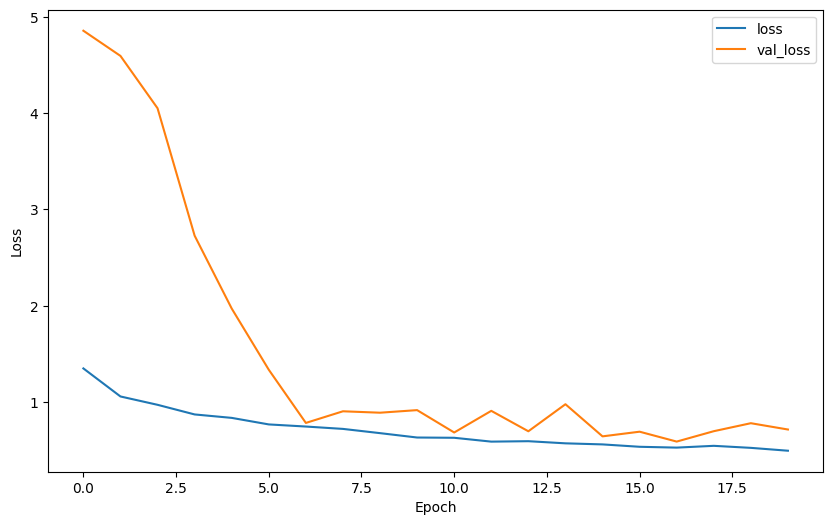

In [136]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

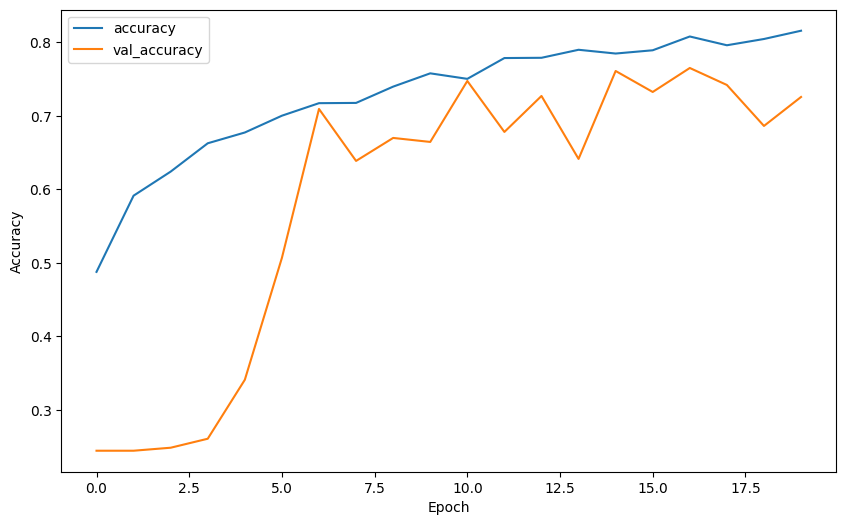

In [137]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [138]:
resnet_model.metrics_names

[]

In [184]:
resnet_model.evaluate(test_image_gen)

23/23 [==============================] - 208s 9s/step - loss: 1.5812 - accuracy: 0.2527


[1.5812004804611206, 0.25271740555763245]

In [140]:
pred_probabilities = resnet_model.predict(test_image_gen)

23/23 [==============================] - 27s 1s/step


In [141]:
pred_probabilities

array([[0.18460627, 0.19813664, 0.20971063, 0.20465313, 0.20289332],
       [0.18352617, 0.20006694, 0.2078376 , 0.2027547 , 0.20581454],
       [0.18495949, 0.20114179, 0.20677298, 0.20190398, 0.20522171],
       ...,
       [0.18688677, 0.20077924, 0.20603517, 0.20172258, 0.20457621],
       [0.18233176, 0.19964185, 0.21118352, 0.2016632 , 0.2051797 ],
       [0.18128023, 0.19944116, 0.21058531, 0.20284152, 0.20585178]],
      dtype=float32)

In [142]:
test_image_gen.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [145]:
probs = np.array(pred_probabilities)
y_train_pred = np.argmax(probs, axis=1)
predictions=y_train_pred

In [146]:
predictions[:50]

array([2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 3, 3, 2, 4, 2, 2, 3, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [147]:
from sklearn.metrics import classification_report,confusion_matrix

In [148]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.00      0.00      0.00       180
           2       0.17      0.74      0.28       129
           3       0.23      0.08      0.12       140
           4       0.24      0.20      0.22       160

    accuracy                           0.19       736
   macro avg       0.13      0.20      0.12       736
weighted avg       0.13      0.19      0.12       736



C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [149]:
confusion_matrix(test_image_gen.classes,predictions)

array([[  0,   1,  91,   9,  26],
       [  0,   0, 142,   4,  34],
       [  0,   0,  95,  13,  21],
       [  0,   1, 110,  11,  18],
       [  0,   1, 116,  11,  32]], dtype=int64)

### Modeli Disa Aktaralim

In [ ]:
from tensorflow.keras.models import load_model
resnet_model.save('flowers_transfer_learning_ResNet152.h5')

### Predicting on External an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_ResNet152.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

In [ ]:
# Birden fazla external resmi birlikte incelemek icin;

import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_ResNet152.h5')

# Yeni resimlerin bulundugu dosya yolu tanimlayalim; 
image_dir = 'r"D:\DL\Project 2 - Flower_photos\mert b\Flower_for_prediction"'

# Bu dizindeki tüm jpg dosyalarının yollarını listeyelim;
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Sınıf isimlerini tanımlayalim; 
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Her bir resmi işleyelim ve tahmin yapalim; 

for image_path in image_paths:
    # Resmi açın ve uygun bir formata dönüştürün
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Tahmin yapın
    prediction = model.predict(image_array)

    # Tahmin edilen sınıfın indexini veadini ekrana alalim;
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names(predicted_class_idx)
    
    
    # Tahmin edilen sınıfı ekrana yazdırın
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Tahmin edilen class: {predicted_class_idx}, {predicted_class_name}")

## EfficientNetV2B2 


### Creat the EfficientNetB2  Model


In [177]:
"""tf.keras.applications.EfficientNetV2B2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)"""

'tf.keras.applications.EfficientNetV2B2(\n    include_top=True,\n    weights="imagenet",\n    input_tensor=None,\n    input_shape=None,\n    pooling=None,\n    classes=1000,\n    classifier_activation="softmax",\n    include_preprocessing=True,\n)'

In [178]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

# EfficientNetV2B2 Modelini çağıralım
EfficientNetV2B2_model = Sequential()

pretrained_model = EfficientNetV2B2(include_top=False,
                                    input_shape=(224, 224, 3),
                                    weights='imagenet',
                                    pooling=None,
                                   classifier_activation="softmax", 
                                   include_preprocessing=True)

# EfficientNetV2B2'nin ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

EfficientNetV2B2_model.add(pretrained_model)

# Flatten Layer (Input)
EfficientNetV2B2_model.add(Flatten())

# ---ANN---

# Fully Connected Layer
EfficientNetV2B2_model.add(Dense(512, activation='relu'))
EfficientNetV2B2_model.add(BatchNormalization())
EfficientNetV2B2_model.add(Dropout(0.3))

# Çıkış Katmanı
EfficientNetV2B2_model.add(Dense(5, activation='softmax'))

# Modeli derleyelim
optimizer = Adam(learning_rate=0.001)
EfficientNetV2B2_model.compile(loss='categorical_crossentropy',
                              optimizer=optimizer,
                              metrics=['accuracy'])

35839040/35839040 [==============================] - 1s 0us/step


### Model Summary


In [179]:
# Model özetini gösterelim
EfficientNetV2B2_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Functio  (None, 7, 7, 1408)        8769374   
 nal)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 68992)             0         
                                                                 
 dense_18 (Dense)            (None, 512)               35324416  
                                                                 
 batch_normalization_28 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_28 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 5)               

### Early Stopping¶

In [180]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

### Model Training (EfficientNetV2B2)

In [181]:
results = EfficientNetV2B2_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/50
92/92 [==============================] - 178s 2s/step - loss: 1.8074 - accuracy: 0.2382 - val_loss: 4.3086 - val_accuracy: 0.1726
Epoch 2/50
92/92 [==============================] - 166s 2s/step - loss: 1.7134 - accuracy: 0.2587 - val_loss: 2.6059 - val_accuracy: 0.1902
Epoch 3/50
92/92 [==============================] - 165s 2s/step - loss: 1.6677 - accuracy: 0.2641 - val_loss: 5.9217 - val_accuracy: 0.2174
Epoch 4/50
92/92 [==============================] - 166s 2s/step - loss: 1.6816 - accuracy: 0.2580 - val_loss: 6.0191 - val_accuracy: 0.1753
Epoch 5/50
92/92 [==============================] - 168s 2s/step - loss: 1.6547 - accuracy: 0.2645 - val_loss: 3.6759 - val_accuracy: 0.2568
Epoch 6/50
92/92 [==============================] - 166s 2s/step - loss: 1.6399 - accuracy: 0.2710 - val_loss: 1.5850 - val_accuracy: 0.2242
Epoch 7/50
92/92 [==============================] - 170s 2s/step - loss: 1.6458 - accuracy: 0.2761 - val_loss: 1.7958 - val_accuracy: 0.1970
Epoch 8/50
92

### Evaluating the Model

In [186]:
EfficientNetV2B2_summary = pd.DataFrame(EfficientNetV2B2_model.history.history)
EfficientNetV2B2_summary.tail()

,loss,accuracy,val_loss,val_accuracy
45,1.540001,0.333674,1.720445,0.203804
46,1.545471,0.313565,1.630435,0.226902
47,1.541616,0.321404,1.493602,0.341033
48,1.534238,0.318337,1.628285,0.289402
49,1.548102,0.314928,1.518855,0.373641


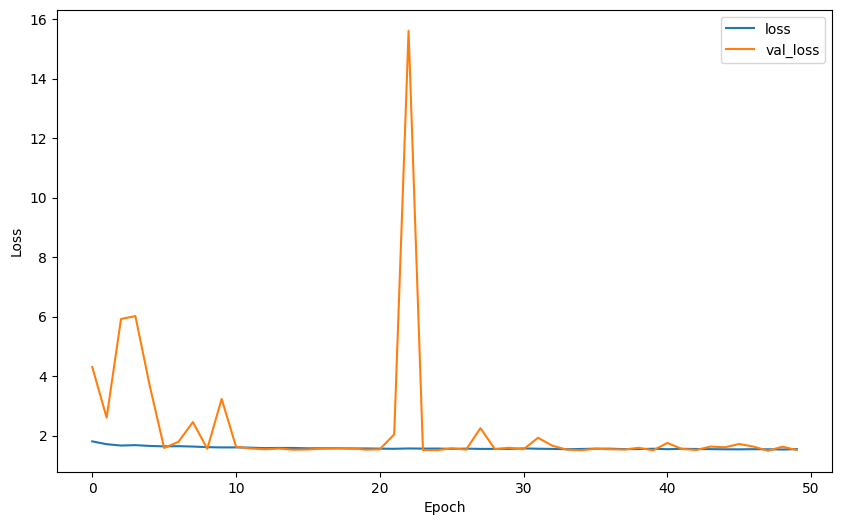

In [187]:
plt.figure(figsize=(10,6))
plt.plot(EfficientNetV2B2_summary.loss, label="loss")
plt.plot(EfficientNetV2B2_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

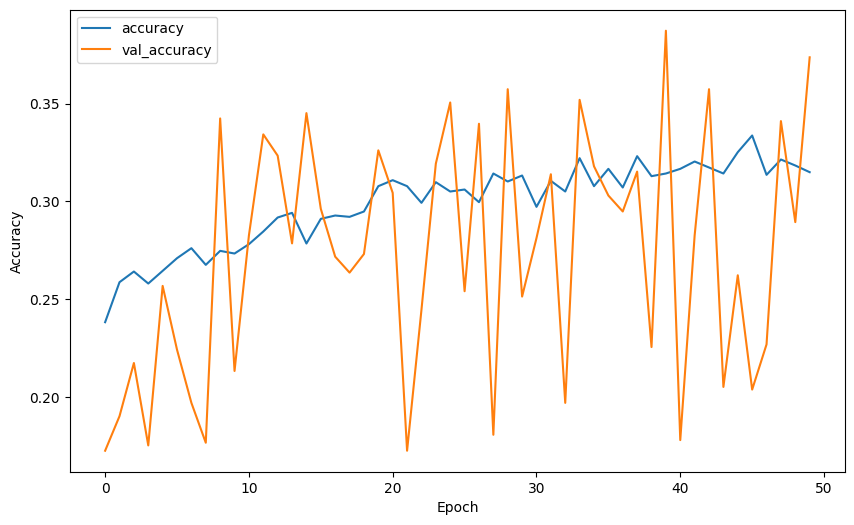

In [188]:
plt.figure(figsize=(10,6))
plt.plot(EfficientNetV2B2_summary.accuracy, label="accuracy")
plt.plot(EfficientNetV2B2_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [189]:
EfficientNetV2B2_model.metrics_names

['loss', 'accuracy']

In [190]:
EfficientNetV2B2_model.evaluate(test_image_gen)

23/23 [==============================] - 41s 2s/step - loss: 1.5189 - accuracy: 0.3736


[1.518855333328247, 0.37364131212234497]

In [191]:
pred_probabilities = EfficientNetV2B2_model.predict(test_image_gen)

23/23 [==============================] - 47s 2s/step


In [ ]:
pred_probabilities

In [ ]:
test_image_gen.classes[:50]

In [192]:
probs = np.array(pred_probabilities)
y_train_pred = np.argmax(probs, axis=1)
predictions=y_train_pred

In [193]:
predictions[:50]

array([1, 0, 1, 0, 4, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 4, 4, 0, 1,
       1, 1, 1, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 1, 0, 4, 4, 1, 1, 1, 0, 0,
       0, 4, 0, 1, 4, 0], dtype=int64)

In [194]:
from sklearn.metrics import classification_report,confusion_matrix

In [195]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.21      0.44      0.29       127
           1       0.27      0.33      0.30       180
           2       0.00      0.00      0.00       129
           3       0.00      0.00      0.00       140
           4       0.19      0.31      0.24       160

    accuracy                           0.22       736
   macro avg       0.14      0.22      0.17       736
weighted avg       0.15      0.22      0.17       736



C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [196]:
confusion_matrix(test_image_gen.classes,predictions)

array([[56, 35,  0,  0, 36],
       [60, 60,  0,  1, 59],
       [40, 34,  0,  0, 55],
       [39, 46,  0,  0, 55],
       [66, 44,  0,  1, 49]], dtype=int64)

### Modeli Disa Aktaralim

In [197]:
from tensorflow.keras.models import load_model
EfficientNetV2B2_model.save('flowers_transfer_learning_EfficientNetV2B2.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predicting on External an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_EfficientNetV2B2.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


In [ ]:
# Birden fazla external resmi birlikte incelemek icin;

import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_EfficientNetV2B2.h5')

# Yeni resimlerin bulundugu dosya yolu tanimlayalim; 
image_dir = 'r"D:\DL\Project 2 - Flower_photos\mert b\Flower_for_prediction"'

# Bu dizindeki tüm jpg dosyalarının yollarını listeyelim;
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Sınıf isimlerini tanımlayalim; 
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Her bir resmi işleyelim ve tahmin yapalim; 

for image_path in image_paths:
    # Resmi açın ve uygun bir formata dönüştürün
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Tahmin yapın
    prediction = model.predict(image_array)

    # Tahmin edilen sınıfın indexini veadini ekrana alalim;
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names(predicted_class_idx)
    
    
    # Tahmin edilen sınıfı ekrana yazdırın
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Tahmin edilen class: {predicted_class_idx}, {predicted_class_name}")


## InceptionV3

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


# InceptionV3 Modelini çağıralım
InceptionV3_model = Sequential()

pretrained_model = InceptionV3(include_top=False,
                               input_shape=(224, 224, 3),
                               weights='imagenet',
                               pooling=None,
                               classifier_activation="softmax"
                               )

# InceptionV3'nin ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

InceptionV3_model.add(pretrained_model)

# Flatten Layer (Input)
#InceptionV3_model.add(Flatten())

# Flatten yerine bu geldi
InceptionV3_model.add(GlobalAveragePooling2D())


# ---ANN---

# Fully Connected Layer
InceptionV3_model.add(Dense(512, activation='relu'))
InceptionV3_model.add(BatchNormalization())
InceptionV3_model.add(Dropout(0.3))

# Çıkış Katmanı
InceptionV3_model.add(Dense(5, activation='softmax'))

# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001) # Baslangic learning  rate degerimiz. LR asagida optimize edilecek. 


# Modeli derleyelim (Compile edelim)
InceptionV3_model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('InceptionV3.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk. 

# Model özeti
InceptionV3_model.summary()

### Early Stopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

### Model Training (InceptionV3)

In [35]:
InceptionV3_model_results = InceptionV3_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.7706
Epoch 1: val_loss improved from inf to 0.48483, saving model to InceptionV3.h5


C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 169s 2s/step - loss: 0.6801 - accuracy: 0.7706 - val_loss: 0.4848 - val_accuracy: 0.8410 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.4385 - accuracy: 0.8446
Epoch 2: val_loss improved from 0.48483 to 0.42927, saving model to InceptionV3.h5
92/92 [==============================] - 246s 3s/step - loss: 0.4385 - accuracy: 0.8446 - val_loss: 0.4293 - val_accuracy: 0.8546 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.4125 - accuracy: 0.8470
Epoch 3: val_loss did not improve from 0.42927
92/92 [==============================] - 579s 6s/step - loss: 0.4125 - accuracy: 0.8470 - val_loss: 0.5116 - val_accuracy: 0.8342 - lr: 0.0010
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.8633
Epoch 4: val_loss improved from 0.42927 to 0.37110, saving model to InceptionV3.h5
92/92 [==============================] - 679s 7s/step - loss: 0.3691 - accur

### Evaluating the Model

In [38]:
InceptionV3_summary = pd.DataFrame(InceptionV3_model.history.history)
InceptionV3_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
39,0.193958,0.923654,0.335043,0.892663,0.0001
40,0.184372,0.930811,0.331924,0.884511,0.0001
41,0.179682,0.939332,0.312242,0.895380,0.0001
42,0.161909,0.943763,0.329117,0.895380,0.0001
43,0.157809,0.943763,0.325935,0.891304,0.0001


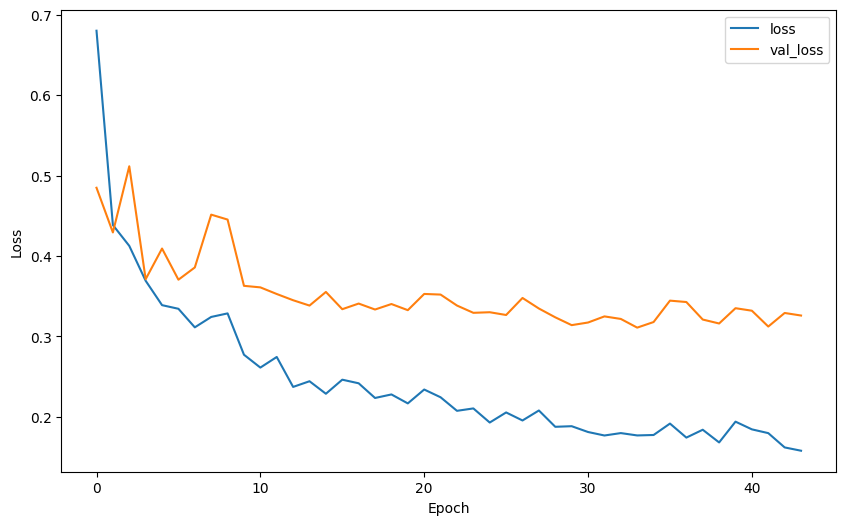

In [39]:
plt.figure(figsize=(10,6))
plt.plot(InceptionV3_summary.loss, label="loss")
plt.plot(InceptionV3_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

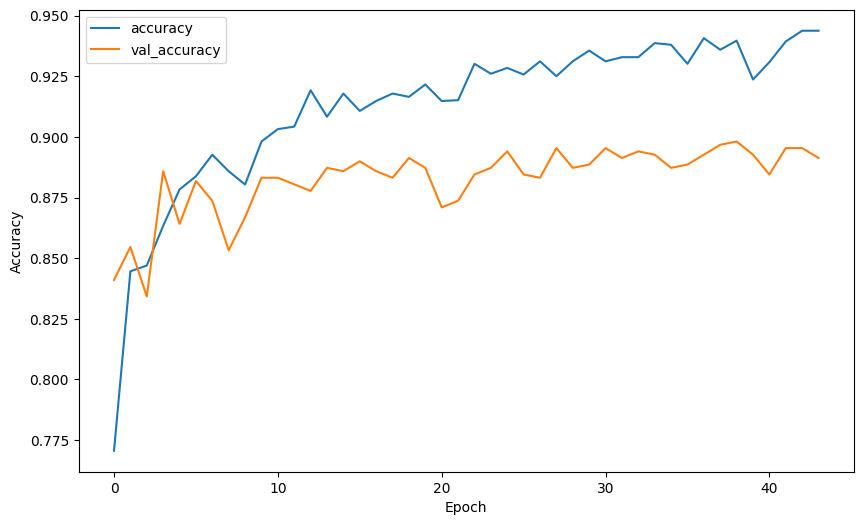

In [40]:
plt.figure(figsize=(10,6))
plt.plot(InceptionV3_summary.accuracy, label="accuracy")
plt.plot(InceptionV3_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [41]:
#Get Predictions;
InceptionV3_model_pred_probabilities = InceptionV3_model.predict(test_image_gen)
InceptionV3_model_pred_probabilities

# Transform Probabilites to Clasesses 
InceptionV3_model_probs = np.array(InceptionV3_model_pred_probabilities)
InceptionV3_model_predictions = np.argmax(InceptionV3_model_probs, axis=1)

# Predictions
print("Predictions: ", InceptionV3_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

23/23 [==============================] - 33s 1s/step
Predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 0]
Actual     :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, InceptionV3_model_predictions))
print(classification_report(test_image_gen.classes, InceptionV3_model_predictions))

[[112   7   1   4   3]
 [  4 162   2   5   7]
 [  1   0 110   4  14]
 [  1   3   4 128   4]
 [  2   0  12   2 144]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       127
           1       0.94      0.90      0.92       180
           2       0.85      0.85      0.85       129
           3       0.90      0.91      0.90       140
           4       0.84      0.90      0.87       160

    accuracy                           0.89       736
   macro avg       0.89      0.89      0.89       736
weighted avg       0.89      0.89      0.89       736



### Modeli Disa Aktaralim

In [46]:
from tensorflow.keras.models import load_model
InceptionV3_model.save('InceptionV3_manuel_saving.h5')

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predicting on External an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_InceptionV3.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\teest.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


In [ ]:
# Birden fazla external resmi birlikte incelemek icin;

import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_transfer_learning_EfficientNetV2B2.h5')

# Yeni resimlerin bulundugu dosya yolu tanimlayalim; 
image_dir = 'r"D:\DL\Project 2 - Flower_photos\mert b\Flower_for_prediction"'

# Bu dizindeki tüm jpg dosyalarının yollarını listeyelim;
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Sınıf isimlerini tanımlayalim; 
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Her bir resmi işleyelim ve tahmin yapalim; 

for image_path in image_paths:
    # Resmi açın ve uygun bir formata dönüştürün
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Tahmin yapın
    prediction = model.predict(image_array)

    # Tahmin edilen sınıfın indexini veadini ekrana alalim;
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names(predicted_class_idx)
    
    
    # Tahmin edilen sınıfı ekrana yazdırın
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Tahmin edilen class: {predicted_class_idx}, {predicted_class_name}")

## XCeption

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Xception modelini çağıralım
Xception_model = Sequential()

# Önceden indirilmiş ağırlıkları kullanalım
pretrained_model = Xception(
                            include_top=False,
                            input_shape=(299, 299, 3),
                            weights='imagenet',  # Önceden indirilmiş ağırlıkları kullan
                            pooling=None,
                            classifier_activation="softmax"
                            )

# Xception'ın ağırlıklarını eğitilemez yapalım
for layer in pretrained_model.layers:
    layer.trainable = False

Xception_model.add(pretrained_model)

# GlobalAveragePooling2D ekleyelim
Xception_model.add(GlobalAveragePooling2D())

# ---ANN---

# Tam bağlı katman ekleyelim
Xception_model.add(Dense(512, activation='relu'))
Xception_model.add(BatchNormalization())
Xception_model.add(Dropout(0.3))

# Çıkış Katmanı
Xception_model.add(Dense(5, activation='softmax'))

# Özelleştirilmiş Adam optimizer'ı kullanalım
optimizer = Adam(learning_rate=0.001)  # Başlangıç öğrenme oranı

# Modeli derleyelim (Compile edelim)
Xception_model.compile(loss='categorical_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])

# Callback'leri tanımlayalım
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('Xception.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

# Öğrenme oranını düzenleyelim (LR)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Model özeti
Xception_model.summary()

### Model Training

In [45]:
Xception_model_results = Xception_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 0.7146 - accuracy: 0.7791
Epoch 1: val_loss improved from inf to 0.43074, saving model to Xception.h5


C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 279s 3s/step - loss: 0.7146 - accuracy: 0.7791 - val_loss: 0.4307 - val_accuracy: 0.8424 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.8412
Epoch 2: val_loss improved from 0.43074 to 0.39905, saving model to Xception.h5
92/92 [==============================] - 275s 3s/step - loss: 0.4485 - accuracy: 0.8412 - val_loss: 0.3991 - val_accuracy: 0.8601 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.3802 - accuracy: 0.8647
Epoch 3: val_loss improved from 0.39905 to 0.37552, saving model to Xception.h5
92/92 [==============================] - 282s 3s/step - loss: 0.3802 - accuracy: 0.8647 - val_loss: 0.3755 - val_accuracy: 0.8641 - lr: 0.0010
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.8746
Epoch 4: val_loss improved from 0.37552 to 0.36462, saving model to Xception.h5
92/92 [==============================] - 299s 3s/

### Evaluating the Model

In [46]:
Xception_summary = pd.DataFrame(Xception_model.history.history)
Xception_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
21,0.161224,0.940695,0.285759,0.910326,0.0001
22,0.147931,0.948534,0.285009,0.914402,0.0001
23,0.151242,0.950920,0.289871,0.913043,0.0001
24,0.158125,0.943081,0.283215,0.915761,0.0001
25,0.157827,0.946489,0.281310,0.913043,0.0001


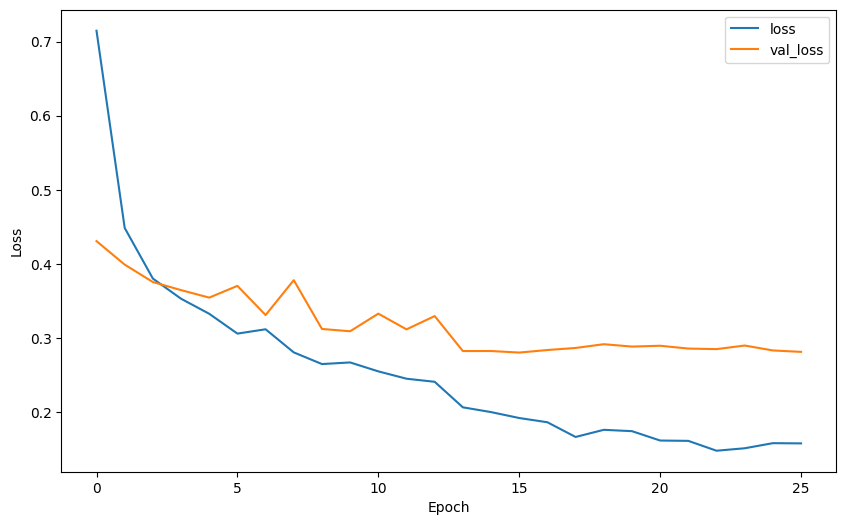

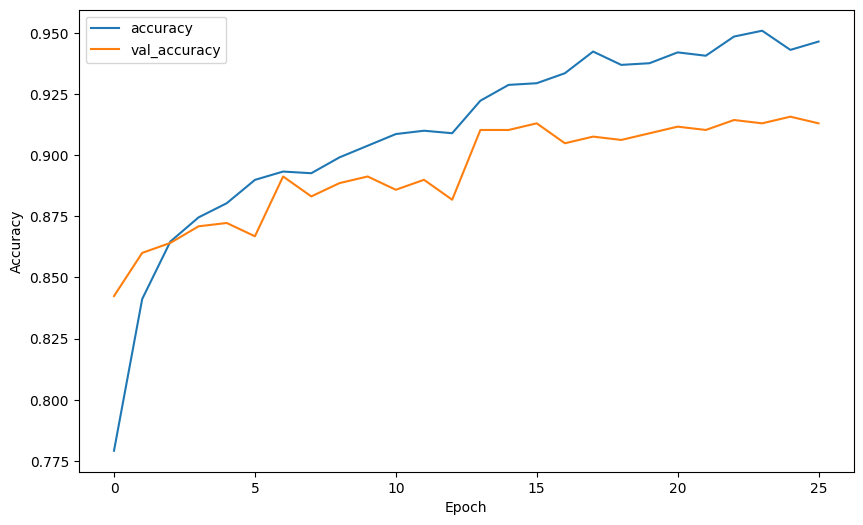

In [47]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(Xception_summary.loss, label="loss")
plt.plot(Xception_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(Xception_summary.accuracy, label="accuracy")
plt.plot(Xception_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()


In [48]:
#Get Predictions;
Xception_model_pred_probabilities = Xception_model.predict(test_image_gen)
Xception_model_pred_probabilities

# Transform Probabilites to Clasesses 
Xception_model_probs = np.array(Xception_model_pred_probabilities)
Xception_model_predictions = np.argmax(Xception_model_probs, axis=1)

# Predictions
print("Predictions: ", Xception_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])


23/23 [==============================] - 54s 2s/step
Predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual     :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [49]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, Xception_model_predictions))
print(classification_report(test_image_gen.classes, Xception_model_predictions))


[[117   7   0   2   1]
 [  4 164   2   4   6]
 [  4   0 113   3   9]
 [  1   3   3 130   3]
 [  0   2   8   2 148]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       127
           1       0.93      0.91      0.92       180
           2       0.90      0.88      0.89       129
           3       0.92      0.93      0.93       140
           4       0.89      0.93      0.91       160

    accuracy                           0.91       736
   macro avg       0.91      0.91      0.91       736
weighted avg       0.91      0.91      0.91       736



### Modeli Disa Aktaralim

In [ ]:
from tensorflow.keras.models import load_model
NASNetMobile_model.save('Xception_Manuel_Saving.h5')

## DenseNet

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization 
MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau 

# DenseNet201 Modelini çağıralım
DenseNet201_model = Sequential()

pretrained_model = DenseNet201(input_shape=(224, 224, 3),
                               include_top=False,
                               weights=None,  # We will not use the pretrained weights
                               pooling=None)

# DenseNet201'nin ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

DenseNet201_model.add(pretrained_model)

# Flatten Layer (Input)
#DenseNet201_model.add(Flatten())

# Flatten yerine bunu kullandim
DenseNet201_model.add(GlobalAveragePooling2D())


# ---ANN---

# Fully Connected Layer
DenseNet201_model.add(Dense(512, activation='relu'))
DenseNet201_model.add(BatchNormalization())
DenseNet201_model.add(Dropout(0.3))

# Çıkış Katmanı
DenseNet201_model.add(Dense(5, activation='softmax'))


# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001) # Baslangic learning  rate degerimiz. LR asagida optimize edilecek. 

# Modeli derleyelim (compile edelim)
DenseNet201_model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('DenseNet201.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk. 


# Model özeti
DenseNet201_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_3  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 512)               983552    
                                                                 
 batch_normalization_101 (B  (None, 512)               2048      
 atchNormalization)                                              
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                

### Model Training

In [71]:
# Modeli eğitelim
DenseNet201_model_results = DenseNet201_model.fit(train_image_gen, epochs=50,
                                                  validation_data=test_image_gen,
                                                  callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 1.3205 - accuracy: 0.4451
Epoch 1: val_loss improved from inf to 1.56185, saving model to DenseNet201.h5
92/92 [==============================] - 410s 4s/step - loss: 1.3205 - accuracy: 0.4451 - val_loss: 1.5619 - val_accuracy: 0.2174 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 1.2032 - accuracy: 0.5147
Epoch 2: val_loss improved from 1.56185 to 1.53039, saving model to DenseNet201.h5
92/92 [==============================] - 405s 4s/step - loss: 1.2032 - accuracy: 0.5147 - val_loss: 1.5304 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 1.1883 - accuracy: 0.5102
Epoch 3: val_loss improved from 1.53039 to 1.48515, saving model to DenseNet201.h5
92/92 [==============================] - 402s 4s/step - loss: 1.1883 - accuracy: 0.5102 - val_loss: 1.4852 - val_accuracy: 0.2609 - lr: 0.0010
Epoch 4/50
92/92 [==========================

### Evaluating the Model

In [72]:
DenseNet201_model_summary = pd.DataFrame(DenseNet201_model.history.history)
DenseNet201_model_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
26,1.014401,0.609407,1.065125,0.578804,0.0001
27,1.001777,0.609748,1.038446,0.576087,0.0001
28,1.006745,0.616224,1.086956,0.561141,0.0001
29,0.992744,0.614519,1.014139,0.597826,0.0001
30,1.004011,0.617246,1.019782,0.616848,0.0001


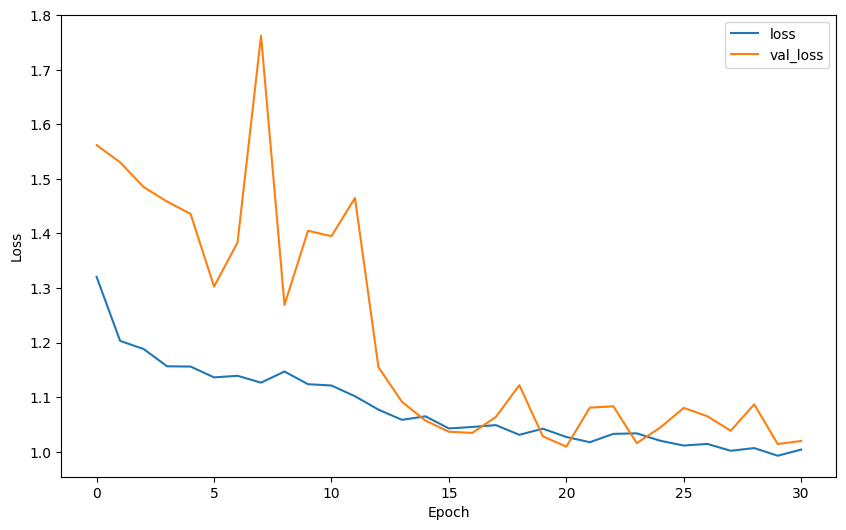

In [73]:
plt.figure(figsize=(10,6))
plt.plot(DenseNet201_model_summary.loss, label="loss")
plt.plot(DenseNet201_model_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

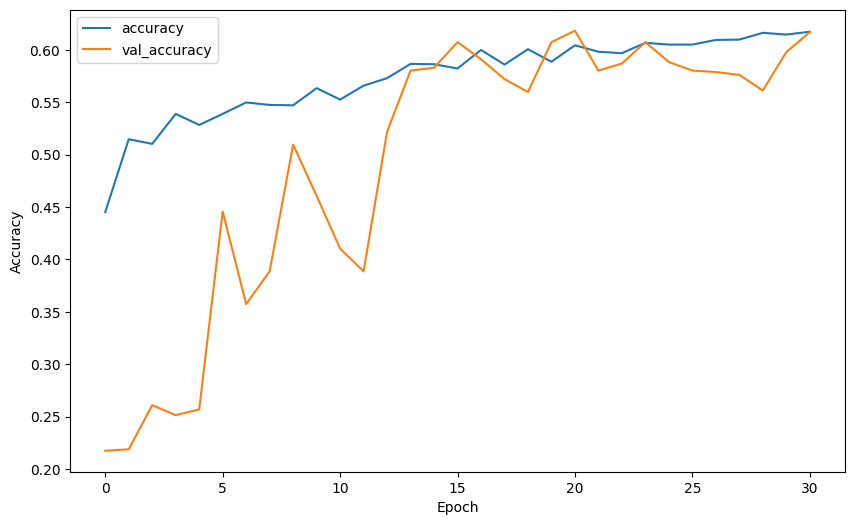

In [74]:
plt.figure(figsize=(10,6))
plt.plot(DenseNet201_model_summary.accuracy, label="accuracy")
plt.plot(DenseNet201_model_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
#Get Predictions;
DenseNet201_model_pred_probabilities = DenseNet201_model.predict(test_image_gen)
DenseNet201_model_pred_probabilities

# Transform Probabilites to Clasesses 
DenseNet201_model_probs = np.array(DenseNet201_model_pred_probabilities)
DenseNet201_model_predictions = np.argmax(DenseNet201_model_probs, axis=1)

# Predictions
print("Predictions: ", DenseNet201_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

In [ ]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, DenseNet201_model_predictions))
print(classification_report(test_image_gen.classes, DenseNet201_model_predictions))

### Modeli Disa Aktaralim

In [ ]:
from tensorflow.keras.models import load_model
DenseNet201_model.save('DenseNet201_manuel_saving.h5')

## NasNet

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# NASNetMobile Modelini çağıralım
NASNetMobile_model = Sequential()

pretrained_model = NASNetMobile(include_top=False,
                                input_shape=(224, 224, 3),
                                weights='imagenet',
                                pooling=None,
                                classifier_activation="softmax"
                                )

# NASNetMobile'ın ağırlıklarını kullanalım
for layer in pretrained_model.layers:
    layer.trainable = False

NASNetMobile_model.add(pretrained_model)

# GlobalAveragePooling2D eklenir
NASNetMobile_model.add(GlobalAveragePooling2D())

# ---ANN---

# Fully Connected Layer
NASNetMobile_model.add(Dense(512, activation='relu'))
NASNetMobile_model.add(BatchNormalization())
NASNetMobile_model.add(Dropout(0.3))

# Çıkış Katmanı
NASNetMobile_model.add(Dense(5, activation='softmax'))

# Optimizer olarak özelleştirilmiş Adam optimizer kullanılır
optimizer = Adam(learning_rate=0.001)  # Başlangıç learning rate değerimiz. LR aşağıda optimize edilecek.

# Modeli derleyelim (Compile edelim)
NASNetMobile_model.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

# Callbacks tanımlanır
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('NASNetMobile.h5',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

# LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
# Başlangıç LR ile başla, val_loss 3 adım boyunca düşmezse LR ile factor oranını çarparak LR'yi düşür
# ve yola yeni LR ile devam et. Bu işlemi LR min 0.0001 olana kadar devam ettir.


# Model özeti
NASNetMobile_model.summary()

### Model Training

In [52]:
NASNetMobile_model_results = NASNetMobile_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 0.7916 - accuracy: 0.7471
Epoch 1: val_loss improved from inf to 0.56230, saving model to NASNetMobile.h5


C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 151s 1s/step - loss: 0.7916 - accuracy: 0.7471 - val_loss: 0.5623 - val_accuracy: 0.7976 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.4996 - accuracy: 0.8269
Epoch 2: val_loss improved from 0.56230 to 0.47554, saving model to NASNetMobile.h5
92/92 [==============================] - 127s 1s/step - loss: 0.4996 - accuracy: 0.8269 - val_loss: 0.4755 - val_accuracy: 0.8315 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.4314 - accuracy: 0.8405
Epoch 3: val_loss improved from 0.47554 to 0.44803, saving model to NASNetMobile.h5
92/92 [==============================] - 119s 1s/step - loss: 0.4314 - accuracy: 0.8405 - val_loss: 0.4480 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.4008 - accuracy: 0.8541
Epoch 4: val_loss improved from 0.44803 to 0.39546, saving model to NASNetMobile.h5
92/92 [==============================

### Evaulating the Model  

In [53]:
NASNetMobile_summary = pd.DataFrame(NASNetMobile_model.history.history)
NASNetMobile_summary.tail()

,loss,accuracy,val_loss,val_accuracy,lr
21,0.230960,0.916155,0.365768,0.880435,0.0001
22,0.218132,0.923313,0.364679,0.880435,0.0001
23,0.223974,0.916837,0.366044,0.877717,0.0001
24,0.211186,0.930470,0.364787,0.880435,0.0001
25,0.213855,0.920586,0.374275,0.880435,0.0001


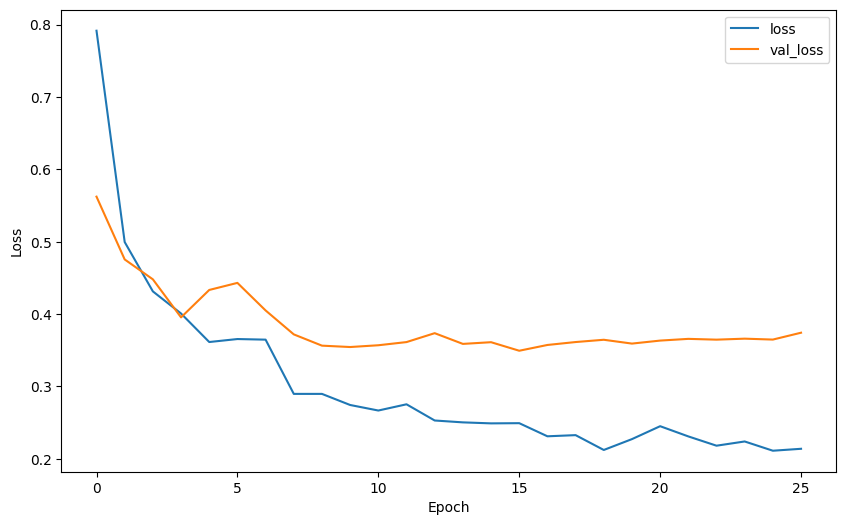

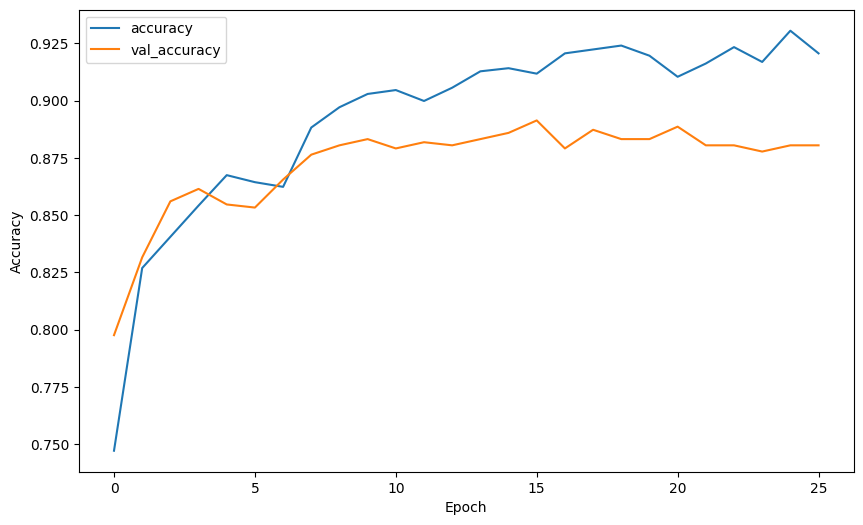

In [54]:
# Loss Figure
plt.figure(figsize=(10,6))
plt.plot(NASNetMobile_summary.loss, label="loss")
plt.plot(NASNetMobile_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Accuracy Figure
plt.figure(figsize=(10,6))
plt.plot(NASNetMobile_summary.accuracy, label="accuracy")
plt.plot(NASNetMobile_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [63]:
NASNetMobile_model_pred_probabilities = NASNetMobile_model.predict(test_image_gen)
NASNetMobile_model_pred_probabilities

# Transform Probabilites to Clasesses 
NASNetMobile_model_probs = np.array(NASNetMobile_model_pred_probabilities)
NASNetMobile_model_predictions = np.argmax(NASNetMobile_model_probs, axis=1)

# Predictions
print("Predictions: ", NASNetMobile_model_predictions[:50])

# Actual Values
print("Actual     : ", test_image_gen.classes[:50])

23/23 [==============================] - 21s 888ms/step
Predictions:  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual     :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
# Eval metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_image_gen.classes, NASNetMobile_model_predictions))
print(classification_report(test_image_gen.classes, NASNetMobile_model_predictions))

[[109   8   2   4   4]
 [  3 162   1   6   8]
 [  1   0 105   7  16]
 [  1   4   2 127   6]
 [  1   0  12   2 145]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       127
           1       0.93      0.90      0.92       180
           2       0.86      0.81      0.84       129
           3       0.87      0.91      0.89       140
           4       0.81      0.91      0.86       160

    accuracy                           0.88       736
   macro avg       0.88      0.88      0.88       736
weighted avg       0.88      0.88      0.88       736



### Modeli Disa Aktaralim

In [65]:
from tensorflow.keras.models import load_model
NASNetMobile_model.save('NASNetMobile_New.h5')

#NASNetMobile_model.save('NASNetMobile2', save_format="h5", encoding="utf-8") Kaydettigin dosyayi acmada sorun yasarsan bunu da kullanabilirsin kaydederken.

C:\Users\ismet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
